In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#this is to import the data 
#this is for the training set
df_train = pd.read_csv ("/home/arpit/study/ML/github/linearRegression/random-linear-regression/train.csv")
df_train = df_train.interpolate(method = 'linear')
m_train = df_train.shape[0]
df_train.min()

x    0.000000
y   -3.839981
dtype: float64

In [3]:
#this is for the test set
df_test = pd.read_csv("/home/arpit/study/ML/github/linearRegression/random-linear-regression/test.csv")
m_test = df_test.shape[0]
m_test

300

In [4]:
df_train = df_train.values                          #making the array

In [5]:
normal = df_train > 200
df_train[normal] = 100

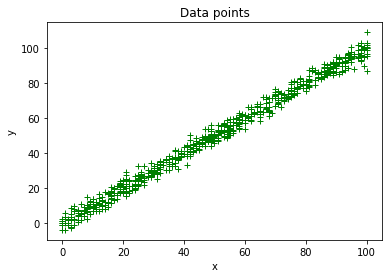

In [6]:
#plotting the training set to visualize the data 
#plotting the hundred data points
plt.xlabel ('x')
plt.ylabel ('y')
plt.title ('Data points')
plt.plot(df_train[0:m_train , 0] , df_train[0:m_train , 1] , 'g+')

In [7]:
mu = df_train.mean(axis = 0)
sd = df_train.std(axis = 0)



In [8]:
#making the array of the df
X = ((df_train[ : , 0] - mu[0])/sd[0]).reshape(m_train , 1)   #taking all the df_train x's and putting them into one-dimensional vector
X = np.hstack ( (np.ones((m_train , 1)) ,X) )
X.shape

(700, 2)

In [9]:
y = ((df_train[: , 1] -mu[1])/sd[1]).reshape(m_train, 1)    #this is the y of the training set
y.shape

(700, 1)

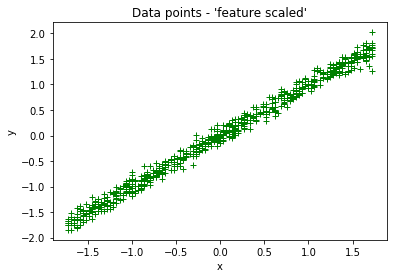

In [10]:
plt.xlabel ("x")
plt.ylabel("y")
plt.title("Data points - 'feature scaled'")
plt.plot(X[0:m_train , 1] , y[0:m_train , 0] , 'g+')

In [11]:
alpha = 0.03

In [12]:
epsilon = 0.000001

In [13]:
iteration = 100

In [14]:
def compute_J (X_compute , y_compute , theta):
    m = X_compute.shape[0]
    error = (X_compute.dot(theta) - y_compute).transpose()
    error = error * error
    error = (error.sum()) / (m * 2)
    return error

In [15]:
def gradient (X_compute , y_compute , theta , alpha):
    m = X_compute.shape[0]
    temp = (X_compute.dot(theta) - y_compute).transpose()
    grad = (temp.dot(X_compute) / m ).transpose()
    return grad

In [16]:
#this is for the gradient descent block
n = 2                      #this one have only two features
num_of_iteration = 0
theta = np.ones((n , 1))
cost1 = compute_J (X , y , theta)


J = np.ones((1 , 2))
while (True):
    num_of_iteration+=1

    #this is to update the value of theta
    grad = gradient(X , y , theta,alpha)
    theta = theta - alpha * grad
        
    #this is to compute the error and terminate gradient descent when the J almost becomes constant
    cost2 = compute_J (X , y ,theta)
    track = np.array([num_of_iteration , cost2])
    J = np.vstack((J , track))
    
    if (abs(cost2 - cost1) < epsilon):
        break
    cost1 = cost2
    


In [17]:
print("number_of_iteration = ", num_of_iteration)
print('\nTheta\n' , theta)
print('\ncost = ' , compute_J(X , y , theta))

number_of_iteration =  170

Theta
 [[0.00563891]
 [0.99523693]]

cost =  0.00479450358231784


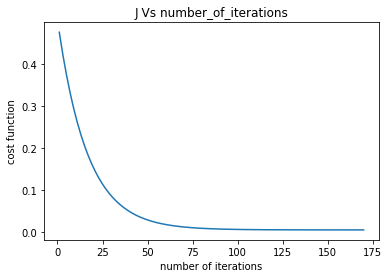

In [18]:
#this is for J versus number of iterations
plt.xlabel("number of iterations")
plt.ylabel("cost function")
plt.title("J Vs number_of_iterations")
plt.plot(J[1: , 0] , J[1: , 1])

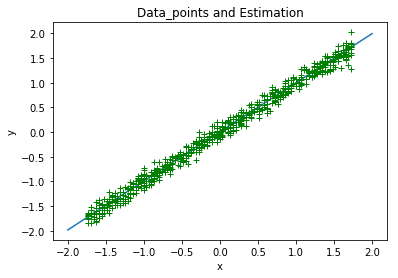

In [19]:
plt.xlabel("x")
plt.ylabel("y")
plt.title ("Data_points and Estimation")
x_axis = np.linspace (-2 , 2 , 1000).reshape(1000 , 1)
x_exp = np.hstack ((np.ones((1000 , 1)) , x_axis))
y_axis = x_exp.dot(theta)
plt.plot(x_axis , y_axis)
plt.plot(X[0:m_train , 1] , y[0:m_train , 0] , 'g+')

In [20]:
#now to test this on the test points
df_test = df_test.values

In [21]:
#creating the X_test
X_test = df_test[ : , 0].reshape(m_test , 1)
X_test = np.hstack ((np.ones((m_test , 1)) , X_test))
X_test.shape

(300, 2)

In [22]:
#creating the y_test
y_test = df_test[: , 1].reshape(m_test , 1)
y_test.shape

(300, 1)

In [23]:
#outputting the result
print('The values of theta\n' , theta )
cost_test = compute_J(X_test , y_test , theta)
print("Cost on the test set it : " , cost_test)

The values of theta
 [[0.00563891]
 [0.99523693]]
Cost on the test set it :  4.857523014728338


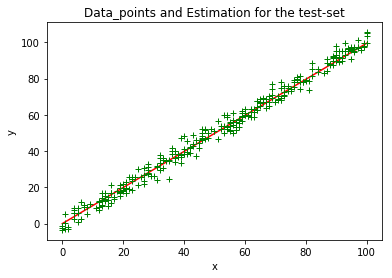

In [24]:
plt.xlabel("x")
plt.ylabel("y")
plt.title ("Data_points and Estimation for the test-set")
x_axis = np.linspace (0 , 100 , 1000).reshape(1000 , 1)
x_exp = np.hstack ((np.ones((1000 , 1)) , x_axis))
y_axis = x_exp.dot(theta)
plt.plot(x_axis , y_axis , color = 'r')
plt.plot(X_test[: , 1] , y_test[: , 0] , 'g+')